In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datasource_parent = "../../../avarda"
source_file_ext = "_Hits_foldchange_annotated.tsv"
os.getcwd()

'/home/anna/project/phageomeLib/Public/Manuscript Analyses'

In [7]:
df = pd.read_csv("../data/VRC.csv", index_col = 0)

In [45]:
if os.path.exists("../data/VRC.csv") :
    print("already available")
    df = pd.read_csv("../data/VRC.csv", index_col = 0)
else :
    print("needs to read")
    screen_under_review = "phipseq_0027"
    df = pd.read_csv(datasource_parent+"/"+screen_under_review+source_file_ext, sep='\t', low_memory=False, index_col=0)
    df = df.loc[:,df.columns.str.contains("VRC")]
    a = pd.DataFrame(index=df.index)

    for subdir, dirs, files in os.walk(datasource_parent):
        for f in files:
            if "phip" in f and "0027" not in f:
                print(f)
                df = pd.read_csv(datasource_parent+"/"+f, sep='\t', low_memory=False, index_col=0) 
                df = df.loc[:,df.columns.str.contains("VRC")]
                a = pd.concat([a, df], axis=1)

    df.columns = df.columns.str.replace("VRC.plasma.VRC_donor.","", regex=False)
    df.columns = df.columns.str.replace(".20A20G.1","", regex=False)

    df.to_csv("../data/VRC.csv", sep = ",")

already available


In [71]:
a = pd.DataFrame(index=df.index)
a["reactive_samples"] = (np.log(df)>0).sum(axis=1)
a["library"] = a.index.str.split("_").str[0] + a.index.str.split("_").str[1]
a["reactive_peptide"] = (a.reactive_samples>0)

In [72]:
a

,reactive_samples,library,reactive_peptide
u_pep_id,,,
AllergomeL_001_ATGGGGTTTATTACCAAGGCGATCCCTATCGTCCTCGCCGCCCTGAGTAC,0,AllergomeL001,False
AllergomeL_001_AACATGTCTTTAGGTGGTCCGCGCTCAGAGGCATCGAATCAGGCGGCCAA,0,AllergomeL001,False
AllergomeL_001_GCTGCGGGGAATGAAAATATGGACGCACAACATTCAAGTCCTGCAAGCGA,0,AllergomeL001,False
AllergomeL_001_GACGATGGTAAGGCGGACTTTTCTAACTATGGGGCAGTAGTGGACGTCTA,0,AllergomeL001,False
AllergomeL_001_GGCGGGAGTACTGACACGTTGTCTGGCACGTCCATGGCATCACCGCATGT,0,AllergomeL001,False
...,...,...,...
HumanLarma_003_GTCCGTAAAGCTAACGAGCGTTGTGAACGCTGTTGTGTTAGCATACAGGA,0,HumanLarma003,False
HumanLarma_003_AGCTTACATAAAGACTTTGCTTTTTACCTGGGCAAAGGCGGGTACTTTTC,2,HumanLarma003,True
HumanLarma_003_ATCAGTCTGCGCCTGCCGAATTTAGAAGCCCCGAGCCATATCAGTGGATC,0,HumanLarma003,False


In [76]:
b = a.groupby(["library","reactive_peptide"], as_index = False).count()
# "reactive_samples" is now actually number of peptides per group
b["reactive_samples"] = b["reactive_samples"]/1000
val = b.pivot_table(index='library',
            columns=['reactive_peptide'], 
            values='reactive_samples',
            aggfunc='first')

val["total"] = (val.loc[:,True]+ val.loc[:,False])
val["library"] = val.index
val["True_perc"] = val.loc[:,True]/(val.loc[:,"total"])*100

In [77]:
val

reactive_peptide,False,True,total,library,True_perc
library,,,,,
AllergomeL001,18.763,0.568,19.331,AllergomeL001,2.938286
HumanLarma002,252.308,7.037,259.345,HumanLarma002,2.713374
HumanLarma003,14.833,0.029,14.862,HumanLarma003,0.195129
PhageomeLa001,97.410,2.865,100.275,PhageomeLa001,2.857143
ToxomeLarm001,93.284,2.317,95.601,ToxomeLarm001,2.423615
VirscanLar001,87.577,8.471,96.048,VirscanLar001,8.819549
VirscanLar002,10.630,NaN,NaN,VirscanLar002,NaN


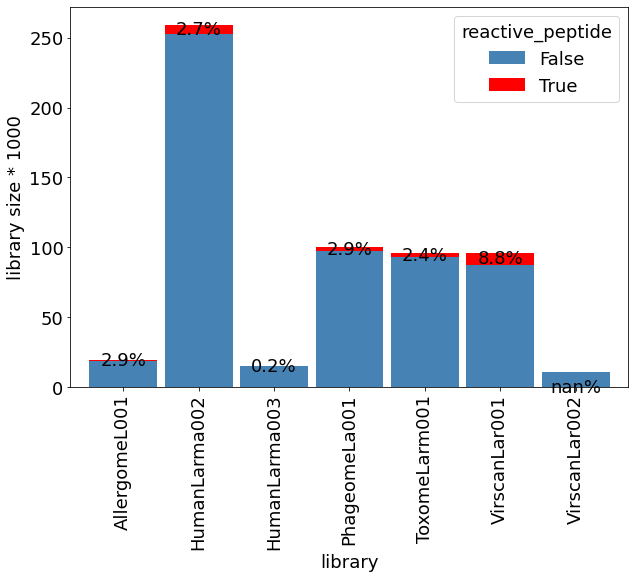

In [78]:
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 18})
ax = val.drop(["total", "True_perc"], axis = 1).plot(kind='bar', stacked=True, color=['steelblue', 'red'], width=0.9)

for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    if c.get_label() == "True":
        labels = round(val["True_perc"],1).astype(str) + "%"
        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(c, labels=labels, label_type='center')

ax.set_ylabel("library size * 1000")
#plt.savefig("./figures/larman_libraries.pdf")
plt.show()

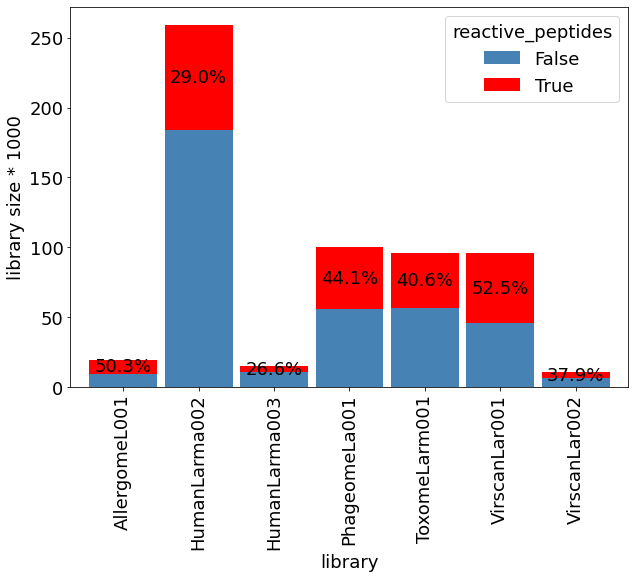

In [130]:
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 18})
ax = val.drop(["total", "True_perc"], axis = 1).plot(kind='bar', stacked=True, color=['steelblue', 'red'], width=0.9)

for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    if c.get_label() == "True":
        labels = round(val["True_perc"],1).astype(str) + "%"
        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(c, labels=labels, label_type='center')

ax.set_ylabel("library size * 1000")
plt.savefig("./figures/larman_libraries.pdf")
plt.show()

In [ ]:
df = pd.read_csv(datasource_parent+"/"+screen_under_review+source_file_ext, sep='\t', low_memory=False, index_col=0)
df = df.loc[:,df.columns.str.contains("VRC")]
a = pd.DataFrame(index=df.index)

for subdir, dirs, files in os.walk(datasource_parent):
    for f in files:
        if "VRC" in f and "0027" not in f:
            print(f)
            df = pd.read_csv(datasource_parent+"/"+f, sep='\t', low_memory=False, index_col=0) 
            df = df.loc[:,df.columns.str.contains("VRC")]
            a = pd.concat([a, df], axis=0)


In [ ]:
df = df.loc[:,~df.columns.str.contains("Beads_Only")]
df.drop(['pep_id','pos_start','pos_end','UniProt_acc','pep_aa','taxon_genus','taxon_species','gene_symbol','product'], axis = 1, inplace = True)